In [1]:
## Inspiration: https://towardsdatascience.com/identify-your-datas-distribution-d76062fc0802

In [137]:
from scipy.stats import *

In [138]:
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline

In [139]:
df = pd.read_csv('vehicles.csv')

In [140]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [142]:
df.shape

(458213, 26)

In [143]:
df.dtypes

Unnamed: 0        int64
id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [144]:
df.columns


Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [145]:
columns = ['id','price','year','manufacturer','condition','odometer']

In [146]:
df = df[columns]

In [147]:
df['year'] = df['year'].apply(lambda x: str(int(x)) if x > 0   else x)

In [148]:
df.head(10)

,id,price,year,manufacturer,condition,odometer
0,7240372487,35990,2010,chevrolet,good,32742.0
1,7240309422,7500,2014,hyundai,excellent,93600.0
2,7240224296,4900,2006,bmw,good,87046.0
3,7240103965,2000,1974,chevrolet,good,190000.0
4,7239983776,19500,2005,ford,excellent,116000.0
5,7239776805,29590,2016,toyota,good,33290.0
6,7239425036,39990,2012,ford,good,9692.0
7,7238667661,41990,2012,chevrolet,good,2778.0
8,7238127696,31990,2017,jeep,good,29614.0
9,7237779886,490,2019,ford,excellent,4775.0


In [149]:
df.describe()

,id,price,odometer
count,4.582130e+05,4.582130e+05,4.029100e+05
mean,7.235233e+09,4.042093e+04,1.016698e+05
std,4.594362e+06,8.194599e+06,3.228623e+06
min,7.208550e+09,0.000000e+00,0.000000e+00
25%,7.231953e+09,4.900000e+03,4.087700e+04
50%,7.236409e+09,1.099500e+04,8.764100e+04
75%,7.239321e+09,2.149500e+04,1.340000e+05
max,7.241019e+09,3.615215e+09,2.043756e+09


In [14]:
df.isna().sum()

id                   0
price                0
year              1050
manufacturer     18220
condition       192940
odometer         55303
dtype: int64

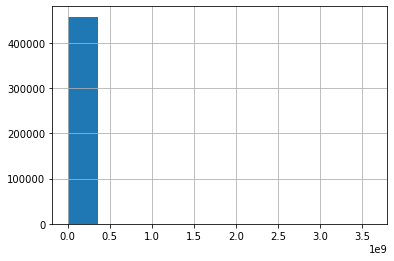

In [15]:
df['price'].hist()

In [16]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [17]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [152]:
fit_distribution('price',0.99,0.01)

(0.7632277149829556, -1.1754946479473236, 1.2882536570292253)

(-8.911690259840561e-17, 0.9999999999999997)

(0.6631696425157605, 3.733945799149187, 1.2482130514042336)

(0.7865637172457626, 3.550740734963806, -1.1754946479473236, 5.79718335298919)

(0.535903945611452, -1.5527498969582751, 2.8974430723439992)

(-1.1754946479473234, 4.90944044709651)

(0.6976229173184187, -1.1754946479473236, 1.3056723410201334)

(-1.1754946479473234, 1.1754946479473234)

(0.7239776224010441, -1.4707748023579015, 1.154752192779032)

(2.295625645830987, 8.903804083047191e-17, 1.3492478301824717)

(4.676784334233846e-10, -1.1827976612383126, 4.917758033482377)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
7         expon     15086.0
4      invgauss     25442.0
8       lognorm     27478.0
3          beta     31966.0
0   weibull_min     42036.0
9      pearson3     54787.0
10       triang    160726.0
6         gamma    211836.0
1        

In [19]:
y_std,len_y,y = standarise('price',0.99,0.01)

Text(0, 0.5, 'Frequency')

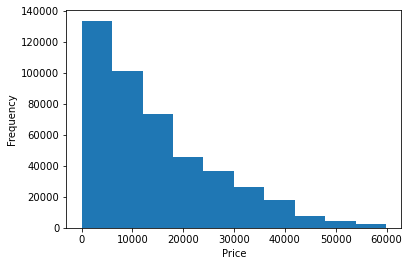

In [20]:
plt.hist(y)
plt.xlabel('Price')
plt.ylabel('Frequency')

ValueError: x and y must have same first dimension, but have shapes (458213,) and (449048,)

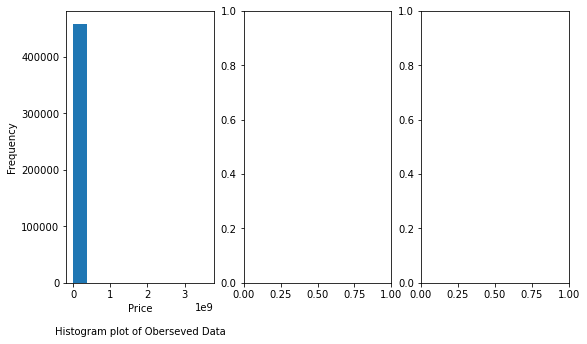

In [151]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(y)
axes[0].set_xlabel('Price\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(y,expon.pdf(y_std,-1.19, 1.19))
axes[1].set_xlabel('Price\n\nExponential Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
axes[2].set_xlabel('Price\n\nInverse-Gaussian Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

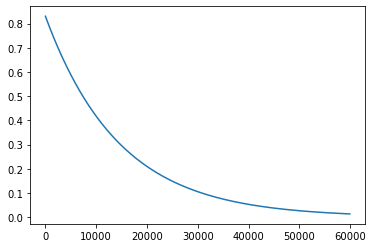

In [22]:
f = plt.figure()
plt.plot(y,expon.pdf(y_std,-1.19, 1.19))
f.show()

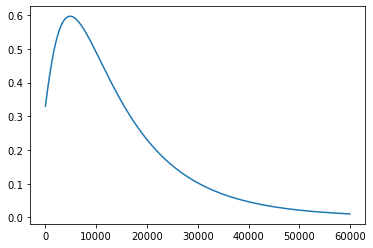

In [23]:
f = plt.figure()
plt.plot(y,invgauss.pdf(y_std,0.45, -1.64, 3.61))
f.show()

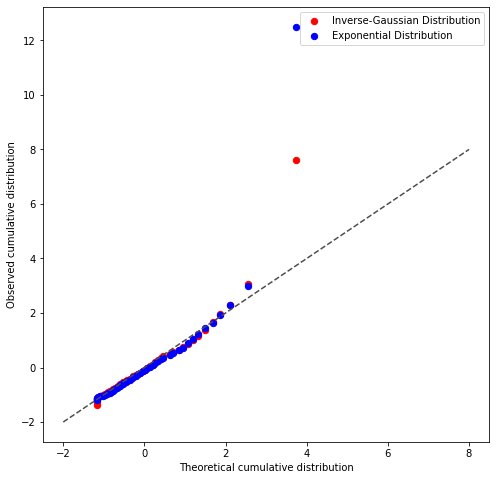

In [24]:
data_points = expon.rvs(-1.19, 1.19, size=2000)   
data_points2 = invgauss.rvs(0.45, -1.64, 3.61,size = 2000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 8], [-2, 8], ls="--", c=".3")

percentile_bins = np.linspace(0,100,51)
percentile_cutoffs1 = np.percentile(y_std, percentile_bins)
percentile_cutoffs_expon= np.percentile(data_points, percentile_bins)


percentile_cutoffs_invgauss = np.percentile(data_points2, percentile_bins)


ax.scatter(percentile_cutoffs1,percentile_cutoffs_invgauss,c='r',label = 'Inverse-Gaussian Distribution',s = 40)
ax.scatter(percentile_cutoffs1,percentile_cutoffs_expon,c='b',label = 'Exponential Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()


In [25]:
fit_distribution('odometer',0.99,0.01)

(0.9818556223328978, -1.5654925164506055, 1.3417153395864205)

(-4.6067742098813384e-18, 0.9999999999999999)

(11.299985620455182, 9.29041292024343, 9.72663874343157)

(1.2217405829039478, 2.4662259863761506, -1.5751082764782347, 4.716015726064862)

(0.1263726207689636, -2.9526290492352, 23.364467052069998)

(-1.5654925164506053, 4.59855705243684)

(2.754826520049602, -1.8017391517440855, 0.6540273699589)

(-1.5654925164506053, 1.5654925164506053)

(0.3294092639466634, -3.088746407409829, 2.9286318388762727)

(1.2050031729940125, -3.927375847245833e-18, 1.0855433902514364)

(0.06078393188665161, -1.6464661424790155, 4.691814144218304)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
3          beta      1709.0
10       triang      2826.0
9      pearson3     11507.0
6         gamma     11508.0
4      invgauss     19203.0
8       lognorm     22233.0
2   weibull_max     30098.0
1          norm     74383.0
7         expon

In [26]:
lst,len_lst,org_lst = standarise('odometer',0.99,0.01)

In [27]:
org_lst[:20]

[10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0]

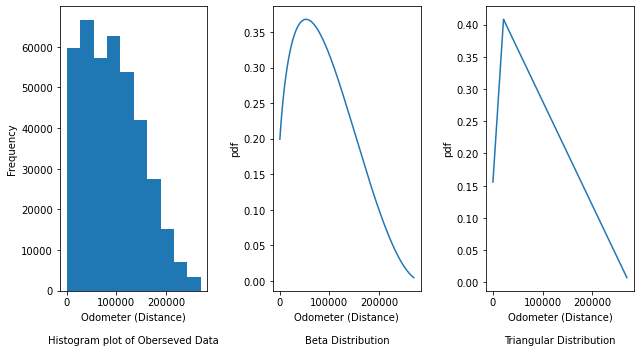

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes[0].hist(org_lst)
axes[0].set_xlabel('Odometer (Distance)\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[1].plot(org_lst,beta.pdf(lst,1.51, 2.94, -1.71, 5.02))
axes[1].set_xlabel('Odometer (Distance)\n\nBeta Distribution')
axes[1].set_ylabel('pdf')
axes[2].plot(org_lst,triang.pdf(lst,.12, -1.79, 4.90))
axes[2].set_xlabel('Odometer (Distance)\n\nTriangular Distribution')
axes[2].set_ylabel('pdf')
fig.tight_layout()

(array([59762., 66622., 57134., 62693., 53911., 42037., 27458., 15059.,
         6925.,  3250.]),
 array([1.00000e+01, 2.70090e+04, 5.40080e+04, 8.10070e+04, 1.08006e+05,
        1.35005e+05, 1.62004e+05, 1.89003e+05, 2.16002e+05, 2.43001e+05,
        2.70000e+05]),
 <a list of 10 Patch objects>)

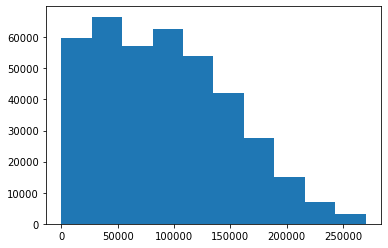

In [29]:
plt.hist(org_lst)

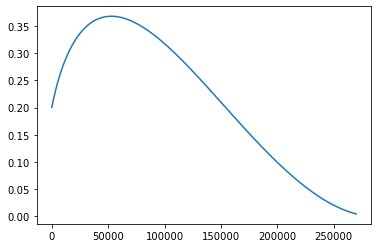

In [30]:
f = plt.figure()
plt.plot(org_lst,beta.pdf(lst,1.5111609633771699, 2.9428574390909983, -1.712121634564888, 5.022935095746597))
f.show()

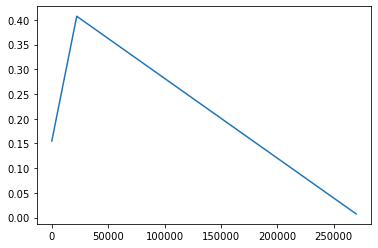

In [31]:
f = plt.figure()
plt.plot(org_lst,triang.pdf(lst,.12388009897125515, -1.7967712548899337, 4.908020533304843))
f.show()

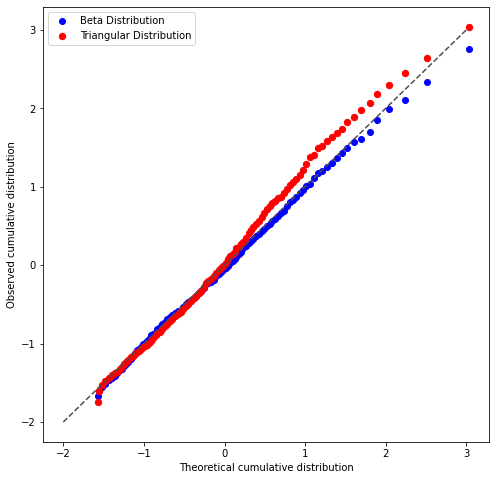

In [32]:
data_points = beta.rvs(1.51, 2.94, -1.71, 5.02,size = 1000)    
  
data_points2 = triang.rvs(.12, -1.79, 4.90,size = 1000) 

f, ax = plt.subplots(figsize=(8,8))
ax.plot([-2, 3], [-2, 3], ls="--", c=".3")

percentile_bins = np.linspace(0,100,101)
percentile_cutoffs1 = np.percentile(lst, percentile_bins)
percentile_cutoffs_beta = np.percentile(data_points, percentile_bins)


percentile_cutoffs_triang = np.percentile(data_points2, percentile_bins)
# print(percentile_cutoffs1,percentile_cutoffs2)

ax.scatter(percentile_cutoffs1,percentile_cutoffs_beta,c='b',label = 'Beta Distribution')
ax.scatter(percentile_cutoffs1,percentile_cutoffs_triang,c='r',label = 'Triangular Distribution',s = 40)


ax.set_xlabel('Theoretical cumulative distribution')
ax.set_ylabel('Observed cumulative distribution')
ax.legend()
plt.show()
